In [1]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_new.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_new.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  moving_x  moving_y  \
0             0.0    Kento MOMOTA     1.0  發短球  ...  0.012041  0.262869   
1             0.0  CHOU Tien Chen     3.0   長球  ... -0.073337  0.594564   
2             0.0    Kento MOMOTA     1.0  發短球  ...  0.011994  0.275664   
3             0.0  CHOU Tien Chen     2.0  推撲球  ... -0.058087  0.142593   
4             0.0    Kento MOMOTA     2.0   殺球  ...  0.158490 -0.000140   

   landing_court_number  ball_distance_x  ball_distance_y   db  set  matc

第一題 (OK)
周天成使用「殺球」得分佔他總得分的百分比是多少？

In [2]:
import pandas as pd

# 假設 df 是已存在的 DataFrame
if len(df) > 0:
    # 1. 過濾出周天成主動得分的回合
    chou_total_wins = df[(df['getpoint_player'] == 'CHOU Tien Chen') & (df['player'] == 'CHOU Tien Chen')]
    
    # 2. 過濾出周天成使用「殺球」得分的回合
    chou_smash_wins = chou_total_wins[chou_total_wins['type'] == '殺球']
    
    # 3. 計算總得分回合數和「殺球」得分回合數
    total_wins_count = chou_total_wins['rally_id'].nunique()  # 使用 rally_id 確保獨立計數
    smash_wins_count = chou_smash_wins['rally_id'].nunique()
    
    # 4. 計算「殺球」得分佔總得分的百分比
    if total_wins_count > 0:  # 防止除以零錯誤
        smash_percentage = (smash_wins_count / total_wins_count) * 100
    else:
        smash_percentage = 0

    # 打印結果
    print(f"周天成使用「殺球」得分佔總得分的百分比: {smash_percentage:.2f}%")
else:
    print("數據框為空，無法進行分析。")

周天成使用「殺球」得分佔總得分的百分比: 71.76%


第二題(OK)
周天成最常使用哪個球種直接得分

周天成使用各球種得分的次數：
type
殺球      61
推撲球      9
接殺防守     5
網前球      4
平球       2
長球       2
切球       2
Name: count, dtype: int64

周天成使用各球種得分的比例：
type
殺球      0.717647
推撲球     0.105882
接殺防守    0.058824
網前球     0.047059
平球      0.023529
長球      0.023529
切球      0.023529
Name: count, dtype: float64


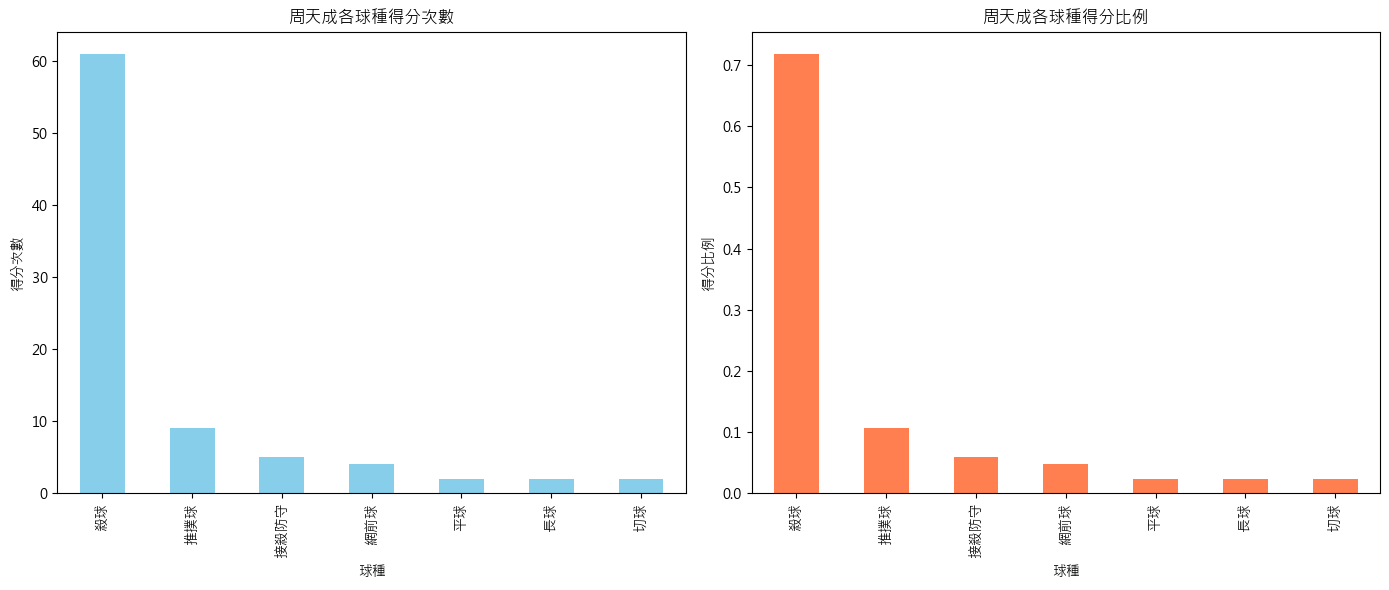

In [3]:
# 引入必要的庫
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據集不為空
if len(df) > 0:
    # 過濾出直接得分的數據，即 `player` 為 'CHOU Tien Chen' 且 `getpoint_player` 為 'CHOU Tien Chen'
    chou_scores = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 根據 `player_type` 分組計數得分次數
    chou_score_counts = chou_scores['type'].value_counts()
    
    # 計算各球種得分比例
    chou_score_ratios = chou_score_counts / chou_score_counts.sum()

    # 打印出結果
    print("周天成使用各球種得分的次數：")
    print(chou_score_counts)
    print("\n周天成使用各球種得分的比例：")
    print(chou_score_ratios)

    # Visualize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # 頻次圖 (Counts)
    chou_score_counts.plot(kind='bar', ax=ax[0], color='skyblue', title='周天成各球種得分次數')
    ax[0].set_xlabel('球種')
    ax[0].set_ylabel('得分次數')

    # 比例圖 (Ratios)
    chou_score_ratios.plot(kind='bar', ax=ax[1], color='coral', title='周天成各球種得分比例')
    ax[1].set_xlabel('球種')
    ax[1].set_ylabel('得分比例')

    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用數據。")

第三題(OK)
針對周天成所有「殺球」，繪製其落點熱區圖。

周天成的殺球數量: 299


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2748036356.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


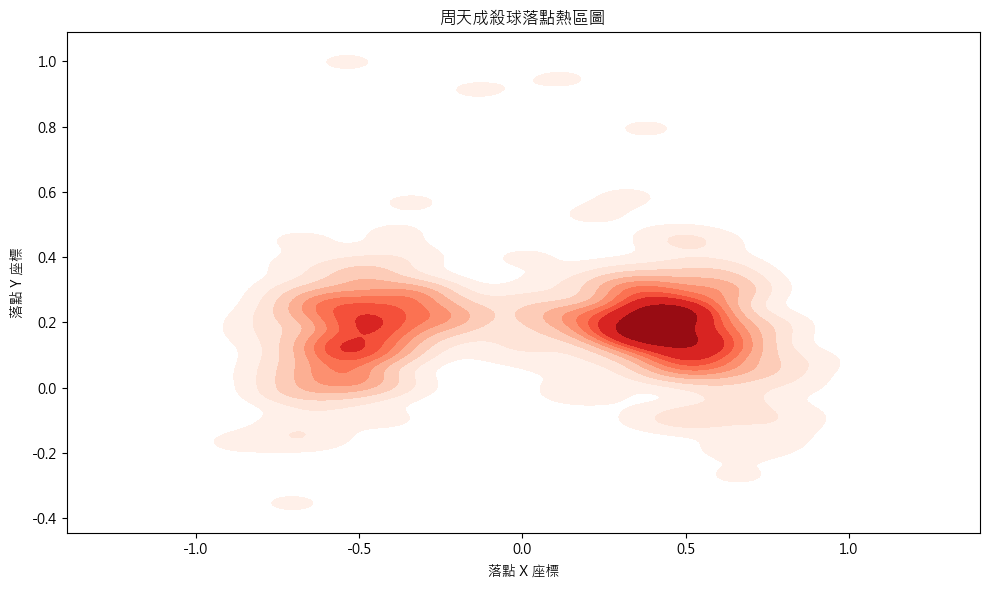

In [4]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定圖表字體以支援繁體中文
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據不為空
if len(df) > 0:
    # 篩選出周天成的所有殺球數據
    chou_smashes = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 確保落點數據完整
    chou_smashes = chou_smashes.dropna(subset=['landing_x', 'landing_y'])

    # 檢查篩選後數據的長度
    print(f"周天成的殺球數量: {len(chou_smashes)}")
    
    # 繪製落點的熱區圖
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=chou_smashes['landing_x'], y=chou_smashes['landing_y'],
        cmap="Reds", shade=True, bw_adjust=0.5
    )
    plt.title('周天成殺球落點熱區圖')
    plt.xlabel('落點 X 座標')
    plt.ylabel('落點 Y 座標')
    plt.axis('equal')  # 保持軸的單位比例
    plt.tight_layout()  # 確保不重疊
    fig = plt.gcf()  # 獲取當前的 figure 對象
else:
    print("數據集為空，無法進行分析。")

# 到這裡，我們完成了對周天成殺球落點的熱區圖的生成。

第四題(OK)
分析周天成在雙方都達18分以上時的球種分布。

周天成在比分達到18以上時所使用的球種分布:
type
網前球     22
接殺防守    11
殺球       7
發短球      6
推撲球      6
長球       5
平球       4
挑球       3
切球       3
Name: count, dtype: int64


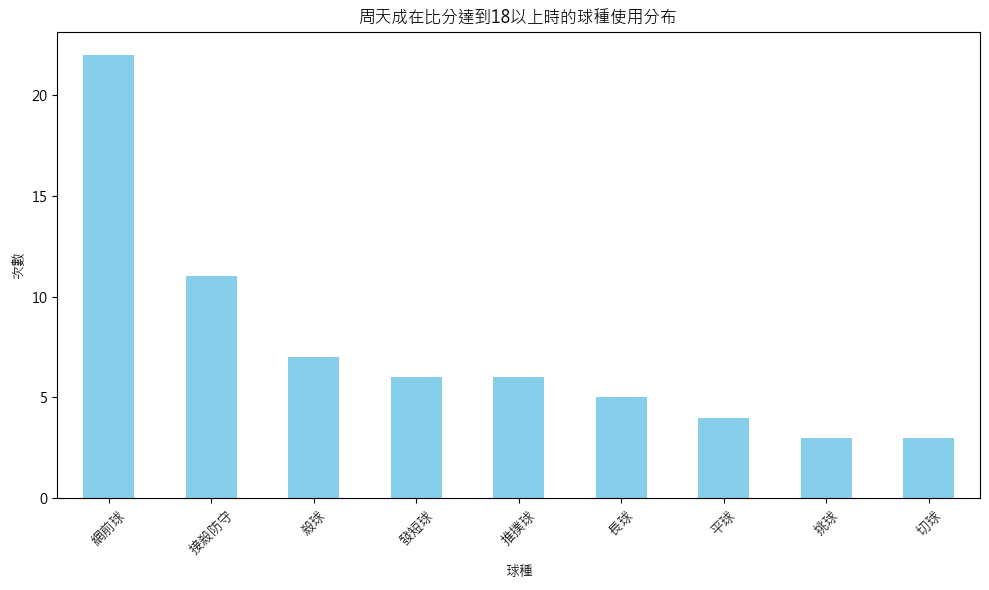

In [5]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據非空
if len(df) > 0:
    # 取得比分都達到18分以上的回合
    filtered_df = df[(df['player_score'] >= 18) & (df['opponent_score'] >= 18)]

    # 過濾周天成的球
    chou_df = filtered_df[filtered_df['player'] == 'CHOU Tien Chen']

    # 計算不同球種的出現次數
    shot_distribution = chou_df['type'].value_counts()

    # 打印分佈
    print("周天成在比分達到18以上時所使用的球種分布:")
    print(shot_distribution)

    # 視覺化球種分布
    fig, ax = plt.subplots(figsize=(10, 6))
    shot_distribution.plot(kind='bar', color='skyblue', ax=ax)
    
    # 標籤和標題
    ax.set_title('周天成在比分達到18以上時的球種使用分布')
    ax.set_xlabel('球種')
    ax.set_ylabel('次數')

    # 設置x軸刻度旋轉
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # 調整圖表布局
    plt.tight_layout()

else:
    print("數據集中無可用的數據進行分析。")

第五題(OK)
幫我繪製周天成造成得分時球的落點熱區圖

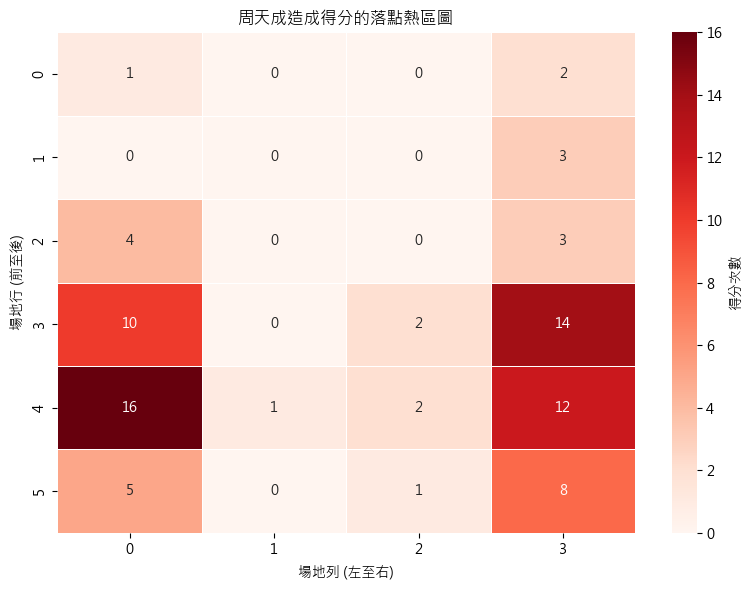

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 字體設置
import platform
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據存在
if len(df) > 0:
    # 篩選出周天成的得分
    chou_score_df = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 確保篩選後的數據量足夠
    if len(chou_score_df) > 0:
        # 根據場地區域來繪製熱區圖
        # 使用np.histogram2d來計算各區域的頻率
        heatmap_data = np.zeros((6, 4))
        zone_mapping = {
            1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3),
            5: (1, 0), 6: (1, 1), 7: (1, 2), 8: (1, 3),
            9: (2, 0), 10: (2, 1), 11: (2, 2), 12: (2, 3),
            13: (3, 0), 14: (3, 1), 15: (3, 2), 16: (3, 3),
            17: (4, 0), 18: (4, 1), 19: (4, 2), 20: (4, 3),
            21: (5, 0), 22: (5, 1), 23: (5, 2), 24: (5, 3)
        }
        
        for area in chou_score_df['landing_area']:
            if area in zone_mapping:
                row, col = zone_mapping[area]
                heatmap_data[row, col] += 1

        # 翻轉數據，方便畫面呈現
        heatmap_data = np.flipud(heatmap_data)

        # 繪製熱區圖
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, ax=ax, cbar_kws={'label': '得分次數'})
        ax.set_title('周天成造成得分的落點熱區圖')
        ax.set_xlabel('場地列 (左至右)')
        ax.set_ylabel('場地行 (前至後)')
        plt.tight_layout()
else:
    print("數據不足以進行分析。")

第六題(OK)
在第一場次中，每回合用的拍數，繪圖

     match_id  set  rally  ball_round
0         1.0    1      1           2
1         1.0    1      2           6
2         1.0    1      3          27
3         1.0    1      4           6
4         1.0    1      5          16
..        ...  ...    ...         ...
102       1.0    3     35          24
103       1.0    3     36           2
104       1.0    3     37           6
105       1.0    3     38          17
106       1.0    3     39          13

[107 rows x 4 columns]


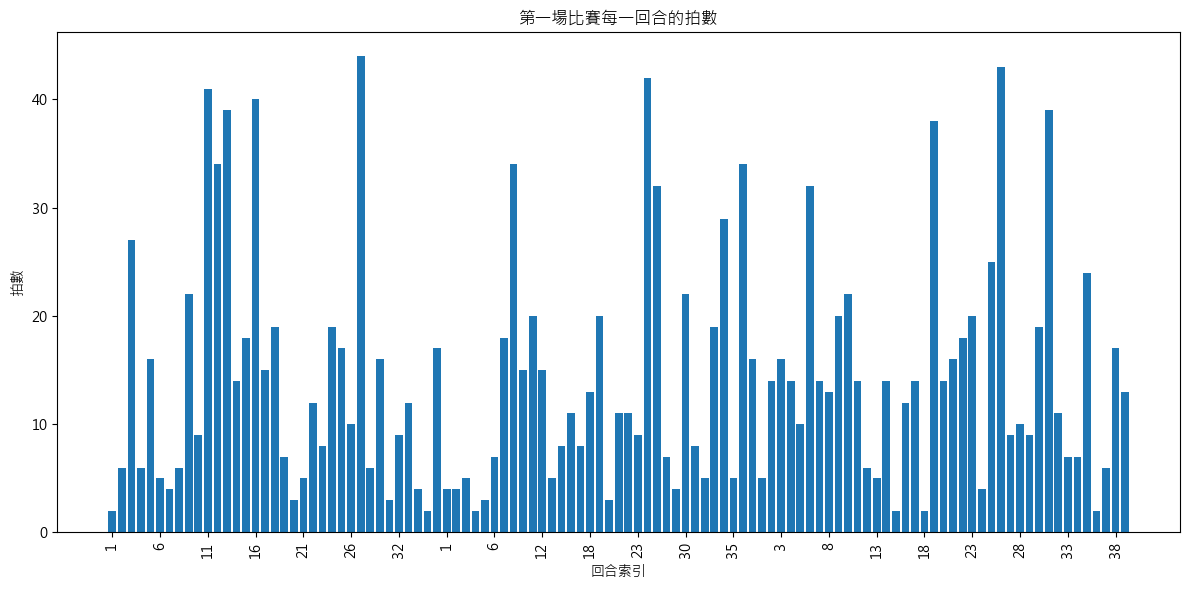

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認資料是否存在
if len(df) > 0:
    # 篩選第一場比賽
    match_1_df = df[df['match_id'] == 1.0]

    # 計算每一回合的拍數
    rally_shots = match_1_df.groupby(['match_id', 'set', 'rally'])['ball_round'].max().reset_index()

    # 打印每一回合的拍數
    print(rally_shots)

    # 視覺化
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(rally_shots.index, rally_shots['ball_round'])
    ax.set_title('第一場比賽每一回合的拍數')
    ax.set_xlabel('回合索引')
    ax.set_ylabel('拍數')
    
    # 設置 X 軸標籤間隔
    step = max(1, len(rally_shots) // 20)  # 每隔 20 個顯示一個標籤
    ax.set_xticks(rally_shots.index[::step])
    ax.set_xticklabels(rally_shots['rally'][::step], rotation=90)
    
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame is empty, no data to process.")

第七題(OK)
繪製周天成殺球時的站點熱區圖

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 篩選數據: 周天成的殺球站位
chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

# 繪圖
if len(chou_smash_df) > 0:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=chou_smash_df['player_location_x'], y=chou_smash_df['player_location_y'], cmap="Reds", shade=True, bw_adjust=0.5)
    
    # 標題和標籤
    plt.title('周天成殺球站位熱區圖')
    plt.xlabel('X 座標')
    plt.ylabel('Y 座標')
    plt.xlim(-0.8, 0.8)  # 設定X軸範圍
    plt.ylim(-0.5, 1.0)  # 設定Y軸範圍

    plt.tight_layout()
    plt.show()
else:
    print("沒有符合條件的數據可用於分析。")

第八題(大致OK)
分析周天成使用殺球，對手都用什麼球種反擊，繪製圓餅圖

In [ ]:
# Import the necessary libraries
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據量是否大於0
if len(df) > 0:
    # 在完整的數據框中，為每個組合（'match_id', 'set', 'rally'）添加下一個球的'player_type'
    df['next_player_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(-1)

    # 過濾周天成使用殺球的行
    chou_smashed = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 過濾掉 NaN，得到周天成殺球後的對手回擊球種
    chou_smashed_next = chou_smashed.dropna(subset=['next_player_type'])

    # 定義球種名稱對應的字典
    shot_type_map = {
        1.0: '發短球',
        2.0: '發長球',
        3.0: '長球',
        4.0: '殺球',
        5.0: '切球',
        6.0: '挑球',
        7.0: '平球',
        8.0: '網前球',
        9.0: '推撲球',
        10.0: '接殺防守',
        11.0: '接不到'
    }

    # 計算周天成殺球後對手回擊球種的分布
    counter_shot_distribution = chou_smashed_next['next_player_type'].map(shot_type_map).value_counts()

    # 合併小比例的類別為 "其他"
    threshold = 0.05 * counter_shot_distribution.sum()
    counter_shot_distribution = counter_shot_distribution.groupby(lambda x: x if counter_shot_distribution[x] >= threshold else '其他').sum()

    # 繪製圓餅圖
    fig, ax = plt.subplots()
    ax.pie(counter_shot_distribution, labels=counter_shot_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # 圖表標題
    ax.set_title('周天成殺球後，對手回擊球種分布')

    # 使用tight layout
    plt.tight_layout()

    # 打印反擊球種分布數據
    print(counter_shot_distribution)